# QNL GDS Factory Tutorial
Elias Lehman 3/16/2024

This documentation is intended to help QNL members effectively navigate GDS Factory. 

Follow the following steps to get started using GDS Factory:

1. Install [https://www.klayout.de/build.html](KLayout) - open source GDS visualization software.

2. Add klive extension (Tools --> Manage packages --> Install new packages) - allows autmoatic update of visualization.

3. Install GDS Factory by running the following cell:

In [1]:
!pip install gdsfactory

DEPRECATION: Loading egg at /usr/local/lib/python3.11/site-packages/uncertainties-3.1.7-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/site-packages/future-0.18.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/site-packages/grblc-0.1.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/site-packages/html5lib-1.1-py3.11.egg is deprecated. pip 24.3 will enforce this behavio

4. Check that GDS Factory is install correctly:

In [2]:
import sys
print(sys.version)
print(sys.executable)

import gdsfactory as gf
gf.config.print_version_plugins()

3.11.0 (main, Oct 25 2022, 14:13:24) [Clang 14.0.0 (clang-1400.0.29.202)]
/usr/local/opt/python@3.11/bin/python3.11


                                                      Modules                                                      
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃    Package ┃ version                                          ┃                                            Path ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     python │ 3.11.0 (main, Oct 25 2022, 14:13:24) [Clang      │       /usr/local/opt/python@3.11/bin/python3.11 │
│            │ 14.0.0 (clang-1400.0.29.202)]                    │                                                 │
│ gdsfactory │ 7.21.0                                           │ /usr/local/lib/python3.11/site-packages/gdsfac… │
│   gplugins │ not installed                                    │                                                 │
│        ray │ not installed                                    │                                                 │
│    femwell │ not installed                                    │                                                 │
│     devsim │ not installed                                    │                                                 │
│     tidy3d │ not installed                                    │                                                 │
│       meep │ not installed                                    │                                                 │
│       meow │ not installed                                    │                                                 │
│     lumapi │ not installed                                    │                                                 │
│        sax │ not installed                                    │                                                 │
└────────────┴──────────────────────────────────────────────────┴─────────────────────────────────────────────────┘

5. Install the klayout generic pdk (layermap and DRC):

In [3]:
! gf install-klayout-genericpdk

removing /Users/elias/.klayout/salt/gdsfactory already installed
Symlink made:
From: /usr/local/lib/python3.11/site-packages/gdsfactory/generic_tech/klayout
To:   /Users/elias/.klayout/salt/gdsfactory


6. Test Component module. Restart KLayout such that klive is active!

In [4]:
def bend(radius: float = 5) -> gf.typings.Component:
    return gf.components.bend_euler(radius=radius, )

component = bend(radius=10)
component.show()

2024-03-25 16:59:00.877 | INFO     | gdsfactory.klive:show:56 - Message from klive: {"version": "0.3.0", "type": "open", "file": "/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/gdsfactory/bend_euler_radius10.gds"}


In [79]:
import gdsfactory as gf
from gdsfactory.cross_section import ComponentAlongPath
import numpy as np

class EmbeddedSnail:
        def __init__(self, cell_height, cell_width, I0_ratio,
                    jj_width, jj_height,
                    bottom_margin):
            self.cell_height = cell_height
            self.cell_width = cell_width
            self.I0_ratio = I0_ratio
            self.jj_width = jj_width
            self.jj_height = jj_height
            self.bottom_margin = bottom_margin

        def unit_cell(self, alt=0):
            cell = gf.Component("UnitCell")
            # Draw cell frame
            cell_frame_left = cell << gf.components.rectangle(size=[self.cell_width / 2 - 1.5 * self.jj_width - 2 * self.bottom_margin, self.cell_height], layer=(20,0))
            cell_frame_left.move([-self.cell_width/2, -self.cell_height/2])

            cell_frame_right = cell << gf.components.rectangle(size=[self.cell_width / 2 - 1.5 * self.jj_width - 2 * self.bottom_margin, self.cell_height], layer=(20,0))
            cell_frame_right.move([1.5 * self.jj_width + 2 * self.bottom_margin, -self.cell_height/2])

            for i in range(4):
                large_junction_frame = cell << gf.components.rectangle(size = [self.bottom_margin, self.jj_height], layer=(20,0))
                large_junction_frame.move([- 1.5 * self.jj_width - 2 * self.bottom_margin + i * (self.bottom_margin+self.jj_width), (-2)**alt * self.cell_height / 2 - self.jj_height])

            for i in range(2):
                small_junction_frame = cell << gf.components.rectangle(size = [self.jj_width + 2 * self.bottom_margin, self.jj_height * self.I0_ratio], layer=(20,0))
                small_junction_frame.move([- 1.5 * self.jj_width - 2 * self.bottom_margin + i * (3 * self.bottom_margin + self.jj_width), (-2)**alt * -self.cell_height / 2])
            
            # Draw small junction on bottom 
            small_junc = cell << gf.components.rectangle(size = [self.jj_width, self.jj_height * self.I0_ratio], layer = (21,0))
            small_junc.move([- self.jj_width / 2, (-2)**alt * -self.cell_height / 2])

            # Draw three large junction on top 
            for i in range(-1, 2):
                large_junc = cell << gf.components.rectangle(size = [self.jj_width, self.jj_height], layer = (21,0))
                large_junc.move([- self.jj_width / 2 + (self.jj_width + self.bottom_margin) * i, (-2)**alt * self.cell_height / 2 - self.jj_height])

            cell = gf.geometry.union(cell, by_layer=True, layer=(1,0))

            cell.add_port(name="in", center=[-self.cell_width/2, 0], width=self.cell_height, orientation=180, layer=(1,0))
            cell.add_port(name="out", center=[self.cell_width/2, 0], width=self.cell_height, orientation=0, layer=(1,0))

            return cell

        def draw_cell(self, alt=0):
            self.unit_cell(alt).show()


            
        # Always alternate cells
        def alt_cells(self):
            alt_cells = gf.Component("AlternatingCells")

            cell = alt_cells << self.unit_cell()
            reflected_cell = alt_cells << self.unit_cell()
            reflected_cell.mirror_y()

            cell.connect(port = "out", destination = reflected_cell.ports["in"])

            alt_cells.add_port(name="in", center=[-self.cell_width/2, 0], width=self.cell_height, orientation=180, layer=(1,0))
            alt_cells.add_port(name="out", center=[3*self.cell_width/2, 0], width=self.cell_height, orientation=0, layer=(1,0))
            alt_cells = gf.geometry.union(alt_cells, by_layer=True, layer=(1,0))

            return alt_cells

        def draw_alternate_cells(self):
            self.alt_cells().show()

        def chain_cells(self, N):
            """Chain cells together in a line. Alternate cells to surpress 3-wave mixing."""
            
            chain = gf.Component("UnitCellChain")

            alt_cells = self.alt_cells()
            
            chain.add_array(alt_cells, columns = int(N/2), rows = 1, spacing = (2*self.cell_width, 100))
            # chain = gf.geometry.union(chain, by_layer=True, layer=(1,0))

            return chain

        def draw_chain(self, N):
            self.chain_cells(N).show()

        def bend_cells(self):
            """Chain alternating cells in a 180 degree bend"""

            path = gf.path.straight() + gf.path.arc(40, angle=180) + gf.path.straight()

            cells = ComponentAlongPath(component = self.unit_cell(), spacing = (2.4*self.cell_width))
            
            alt_cells = ComponentAlongPath(component = self.unit_cell(alt=1), spacing = (2.4*self.cell_width), padding=self.cell_width)
            x = gf.CrossSection(components_along_path=[cells, alt_cells])
            bend = gf.path.extrude(path, cross_section=x)

            return bend

        def draw_bend(self):
            self.bend_cells().show()

2024-03-27 15:28:41.201 | INFO     | gdsfactory.klive:show:56 - Message from klive: {"version": "0.3.0", "type": "open", "file": "/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/gdsfactory/union_00a5637d.gds"}
2024-03-27 15:28:41.230 | INFO     | gdsfactory.technology.layer_views:to_lyp:1017 - LayerViews written to '/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/gdsfactory/union_00a5637d.lyp'.


union_00a5637d: uid 0a4e2f89, ports [], references [], 15 polygons

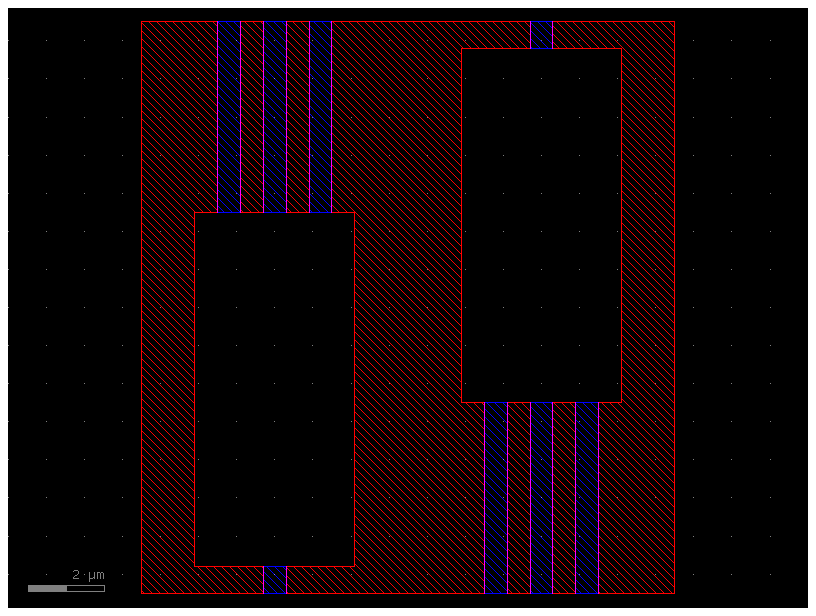

In [80]:
cell_layout = EmbeddedSnail(cell_height=15, cell_width=7, I0_ratio = 0.14, bottom_margin=0.6, jj_width=0.6, jj_height=5)
cell_layout.alt_cells()

In [81]:
class Trace():
    """Class for drawing wires along a input path
        Args: 
        line_wdith: 1xN array of widths for path segments
        num_lines: N lines for drawing CPW or other multiline comps
        start: init coordinate
        gap: spacing between center of each line and center of its neighbors
    """
    def __init__(self, line_width, gap, trench_count=2, start=(0, 0)):
        self.path = gf.path.straight(length=0)
        self.line_width = line_width
        self.gap = gap
        self.start = start
        self.trench_count = trench_count
    
    def straight(self, length):
        """Adds a straight portion to this Trace's path.
        
        Args:
            length (float): length of straight path in micron.
        """
        self.path += gf.path.straight(length)
        return self

    def turn(self, radius, angle):
        """Adds a turn to this Trace's path.
        
        Args:
            radius (float): turn radius of turn in micron.
            angle (float): turn angle in degrees.
        """

        self.path += gf.path.arc(radius=radius, angle=angle)
        return self
    
    def half_segment(
            self, 
            length, 
            radius):
        """Half a meander segment in length, followed by a quarter turn.
        
        Args:
            length (float): length of the half segment.
            radius (float): radius of the quarter turn.add()
        """
        self.turn(radius=radius, angle=-90)
        self.straight(length/2)

        return self

    def meander(
        self,
        num_segments,
        length,
        radius,
        turn=1,
        extra_turns='both',
        length_type='segment',
    ):
        """Draws a meandering section that begins with a straight segment.

        Args:
            num_segments (int): The number of straight segments to include
            length (float): The length of the straight segments or the total
                length, depending on the value of `length_type`.
            radius (float): The radius of the turn.
            turn (int): The direction of the first turn is given by `pi * turn`
            length_type (str): Specifies whether `length` is the segment
                length or the total length of the meander.
            extra_turns (str): A keyword that specifies whether to add an extra 
                at the start of the meander, the end of the meander, or both. 
                Valid keywords are `start`, `end`, `both`.
        Returns:
            Path: This `Path` object.
        """

        if length_type == 'segment':
            segment_length = length
        else:
            total_length = length
            turn_length = (num_segments - 1) * np.pi * radius
            
            if extra_turns in ['start', 'end', 'both']:
                turn_length += {'start': 1, 'end': 1, 'both': 2}[extra_turns] * np.pi * radius
            
            segment_length = (total_length - turn_length) / num_segments
        
        assert turn in [-1, 1], 'Turn must be +/- 1'

        if extra_turns in ['start', 'both']:
            self.turn(radius, 180*turn)
            turn = -1*np.sign(turn)

        for _ in range(num_segments - 1):
            self.straight(segment_length)
            self.turn(radius, 180*turn)

            turn = -1*np.sign(turn)

        self.straight(segment_length)

        if extra_turns in ['end', 'both']:
            self.turn(radius, 180*turn)

        return self

    def get_cross_section(self):
        if (self.trench_count % 2):
            section = [gf.Section(width=self.gap, offset=0, layer=(1, 0), port_names=("in", "out"))]
            for i in range(self.trench_count-1):
                section.append(gf.Section(width=self.gap, offset= (-1) ** (i+1) * self.line_width/2, layer=(1, 0), name = f'line_{i}'))
        else:
            section = []
            for i in range(self.trench_count):
                section.append(gf.Section(width=self.gap, offset= (-1) ** (i) * self.line_width/2, layer=(1, 0), name = f'line_{i}', port_names=(f'in_{i}', f'out_{i}')))

        return gf.CrossSection(sections = section)

    def make(self):
        """Function to extrude Trace sections (wires) onto Trace path."""
        trace = self.get_cross_section()
        return gf.path.extrude(self.path, cross_section = trace)
    
    def append(self, path):
        self.path += path
    
    def draw(self):
        return self.make().show()

In [82]:
import gdsfactory as gf
import numpy as np
# Example:
chip = gf.Component()
cpw = Trace(gap=0.1, line_width=10)
chip << cpw.straight(50).half_segment(500,20).meander(10, 500, 20).straight(250).half_segment(250, 20).make()
chip.show()

2024-03-27 15:29:39.365 | WARNING  | gdsfactory.component:_write_library:1980 - UserWarning: Unnamed cells, 1 in 'Unnamed_b5b93c45'


/usr/local/lib/python3.11/site-packages/gdsfactory/show.py:47: UserWarning: Unnamed cells, 1 in 'Unnamed_b5b93c45'
  gdspath = component.write_gds(


2024-03-27 15:29:39.595 | INFO     | gdsfactory.klive:show:56 - Message from klive: {"version": "0.3.0", "type": "open", "file": "/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/gdsfactory/Unnamed_b5b93c45.gds"}


In [83]:
class Launch:
    def __init__(self, cpw, port = "in_1", pad_width=250, gap=10, pad_height=250, taper_length=250):
        self.cpw = cpw
        self.port = port
        self.pad_width = pad_width
        self.pad_height = pad_height
        self.gap = gap
        self.taper_length = taper_length

    def make(self):
        lp = gf.Component("LaunchPad")
        incoming_cross_section = self.cpw.get_cross_section()
        launch_pad_cross_section = Trace(gap=self.gap, line_width=self.pad_height).get_cross_section()
        transition = lp << gf.components.taper_cross_section(cross_section1=incoming_cross_section, 
                                                        cross_section2=launch_pad_cross_section,
                                                        length=self.taper_length, 
                                                        linear=False,
                                                        width_type="sine")
        transition.connect("in_1", self.cpw.make().ports[self.port])
        pad = lp << gf.path.extrude(gf.path.arc(radius=self.pad_width/2, angle=180), layer=(1,0), width=self.gap)
        pad.connect("o1", transition.ports["out_0"])
        
        return lp

    def draw(self):
        return self.make().show()
    

In [92]:
class ReverseKerrTWPA:
    def __init__(self, chip_width, chip_height, margin,
                 line_gap, line_width, segment_spacing,
                 delay_length, num_paths, cell):
        # Substrate parameters
        self.chip = gf.components.die(
                    size=(chip_width, chip_height),  # Size of die
                    street_width=0,  # Width of corner marks for die-sawing
                    street_length=1000,  # Length of corner marks for die-sawing
                    die_name="RevKerrTWPA",  # Label text
                    text_size=70,  # Label text size
                    text_location="NE",  # Label text compass location e.g. 'S', 'SE', 'SW'
                    layer=(20, 0),
                    bbox_layer=(5, 0)
                )
        
        self.cell = cell
        self.cell_height = cell.cell_height
        self.cell_width = cell.cell_width
        
        self.line_gap = line_gap
        self.line_width = line_width

        self.turn_radius = segment_spacing/2
        self.delay_length = delay_length
        self.num_paths = num_paths
        self.margin = margin

        self.total_devices = 0

    def draw(self):
        twpa = self.make()
        twpa.show()


    def make(self):
        twpa = gf.Component("RevKerrTWPA")

        twpa << self.chip

        segment_length = self.chip.size[0]-2.5*(self.margin)-2*(self.turn_radius)
        trace = Trace(gap=self.line_gap, line_width = self.line_width + self.line_gap)
        start=(-self.chip.size[1]/2+self.margin+500, self.margin/2)

        launch_in = Launch(trace, port="in_0")
        launch_ref = twpa << launch_in.make()
        launch_ref.move(start)

        # cpw_trace = trace.straight(
        #                         self.delay_length
        #                         ).half_segment(
        #                             segment_length, 
        #                             self.turn_radius
        #                             ).meander(
        #                                 self.num_paths, 
        #                                 segment_length, 
        #                                 self.turn_radius,
        #                                 extra_turns='both'
        #                                 ).straight(
        #                                     segment_length/2
        #                                     ).half_segment(
        #                                         self.delay_length + self.turn_radius,
        #                                         self.turn_radius)

        trace.straight(
            self.delay_length
        ).turn(
            radius=self.turn_radius, 
            angle=-90
        )

        cpw_trace = trace.straight(segment_length/2)

        x_pos = -self.chip.size[0]/2 + self.delay_length + 500 + 3*self.turn_radius
        y_pos = -self.chip.size[1]/2 + self.margin + 1.8*self.turn_radius
        
        for i in range(self.num_paths):
            trace.turn(radius=self.turn_radius, angle=180*(-1)**(i)).straight(segment_length)
            N_lin_cells = int(segment_length / self.cell_width) - 1
            x_pos += 2*self.turn_radius
            segment = twpa << self.cell.chain_cells(N_lin_cells)
            segment.rotate(90)
            segment.move((x_pos, y_pos))

        print(f"{N_lin_cells*(self.num_paths-2)} cells")            
        trace.turn(
           radius=self.turn_radius,
           angle=180
        ).straight(
            segment_length/2
        ).turn(
            radius=self.turn_radius, 
            angle=-90
        ).straight(
            self.delay_length
        )

        cpw = twpa << cpw_trace.make()
        cpw.move(start)
        
        # embedded_cells = twpa << self.embed_cells(cpw_trace.path)
        # embedded_cells.move(start)

        # print(embedded_cells)
    
        launch_out = twpa << Launch(cpw_trace, port="out_1").make()
        launch_out.move(start)

        #AQT Logo
        aqt_logo = twpa << gf.import_gds(gdspath="AQT.gds", cellname='AQT', flatten=False)
        aqt_logo.move((-self.chip.size[0]/2+250, self.chip.size[1]/2-175))

        # device = comp << gf.geometry.union(comp, by_layer=True)
        
        return twpa

    def embed_cells(self, path):
        """Function to extrude cells onto path.
            DEPRECIATED!
        """
        unit_cells = ComponentAlongPath(component = self.cell.alt_cells(), spacing = 2*self.cell_width)
        x = gf.CrossSection(components_along_path=[unit_cells])
        embedded_cells = gf.path.extrude(path, cross_section=x)
        return embedded_cells

In [93]:
TWPA = ReverseKerrTWPA(chip_height=5000, chip_width=5000, margin = 100, line_gap=0.165, line_width=cell_layout.cell_height, segment_spacing=100, cell=cell_layout, delay_length=100, num_paths=34)
TWPA.draw()
# TWPA.make().write_gds("RevKerrTWPA.gds")

2024-03-27 15:49:42.960 | WARNING  | gdsfactory.component_reference:connect:812 - UserWarning: Port width mismatch: 0.165 != 0.164 in taper_cross_section_3e6ecbb1 on layer (1, 0)


/usr/local/lib/python3.11/site-packages/gdsfactory/component_reference.py:812: UserWarning: Port width mismatch: 0.165 != 0.164 in taper_cross_section_3e6ecbb1 on layer (1, 0)
  warnings.warn(message)


21216 cells
2024-03-27 15:49:44.274 | INFO     | gdsfactory.klive:show:56 - Message from klive: {"version": "0.3.0", "type": "open", "file": "/var/folders/8g/g48bxxwn3139k68mrwrpq2xw0000gn/T/gdsfactory/RevKerrTWPA$25.gds"}
